<a href="https://colab.research.google.com/github/meetAmarAtGithub/8_Fuzzy_Logic/blob/main/Day2/2_Traffic_signal_fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d6fda6e772371ab495d9698d4b823443a0e9ea3051ec3377f69a87d95d2dad42
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
#Alfebraic computation
import numpy as np

#For domain, linguistic 
import skfuzzy as fuzz

#Fuzzy inference system
from skfuzzy import control as ctrl

In [ ]:
#Pedestrian density
pedestrian = ctrl.Antecedent([0, 30], 'pedestrian')
pedestrian.automf(3)

#Traffic density
traffic = ctrl.Antecedent([0 , 20], 'traffic')
traffic.automf(3)

In [ ]:
#New consequent object 0 - Red, 1 - Green
light = ctrl.Consequent([0 , 1], 'Light')

## Auto-membership function population is possible with .automf(3, 5, or 7)
#pedestrian.automf(3)
#traffic.automf(3)

In [ ]:
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
light['Green'] = fuzz.trimf(light.universe, [0 , 0, 15])
light['Green'] = fuzz.trimf(light.universe, [0, 15 , 30])
light['Red'] = fuzz.trimf(light.universe, [15, 15, 30])

In [ ]:
rule1 = ctrl.Rule(pedestrian['poor'] | traffic['poor'], light['Green'])
rule2 = ctrl.Rule(pedestrian['average'] | traffic['poor'], light['Red'])
rule3 = ctrl.Rule(pedestrian['good'] | traffic['poor'], light['Red'])
rule4 = ctrl.Rule(pedestrian['poor'] | traffic['average'], light['Green'])
rule5 = ctrl.Rule(pedestrian['poor'] | traffic['good'], light['Green'])

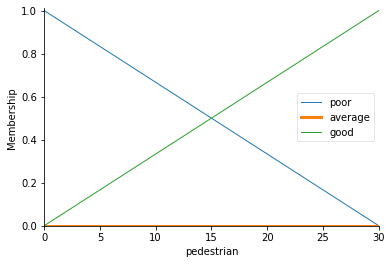

In [ ]:
pedestrian['average'].view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efe1fcbe290>)

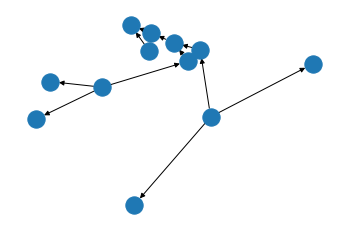

In [ ]:
rule1.view()

In [ ]:
traffic_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

In [ ]:
traffic_light = ctrl.ControlSystemSimulation(traffic_ctrl)

In [ ]:
traffic_light.input['pedestrian'] = 9
traffic_light.input['traffic'] = 15

# Crunch the numbers
traffic_light.compute()

In [ ]:
print(traffic_light.output['Light'])

0.6666666666666666


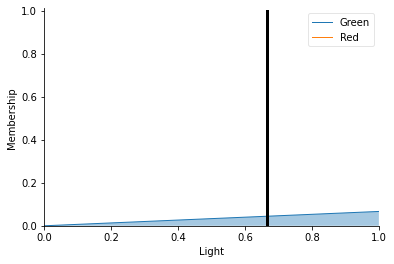

In [ ]:
light.view(sim=traffic_light)